In [10]:
# https://www.tensorflow.org/api_docs/python/tf/keras/datasets >> datasets in tf.keras

In [11]:
import tensorflow as tf
from matplotlib import pyplot as plt
import numpy as np

In [12]:
objects =  tf.keras.datasets.mnist
(training_images, training_labels), (test_images, test_labels) = objects.load_data()

In [13]:
print(f'training_images: {training_images.shape}')  # Number of pixels
print(f'training_labels: {training_labels.shape}')  # Number of pixels
print(f'test_images: {test_images.shape}')  # Number of pixels
print(f'test_labels: {test_labels.shape}')  # Number of pixels

training_images: (60000, 28, 28)
training_labels: (60000,)
test_images: (10000, 28, 28)
test_labels: (10000,)


(60000, 28, 28)


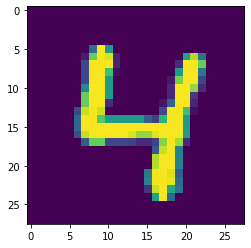

In [14]:
print(training_images.shape)
# print(training_images[0])
plt.imshow(test_images[56])

In [15]:
training_images  = training_images / 255.0    ## لتحويل القيم بين الصفر والواحد
test_images = test_images / 255.0

In [16]:
model = tf.keras.models.Sequential([tf.keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(28,28,1)),  # over the 2D input data,  kernel_size: حجم الـfilter, activation: Activation function(decide iof neuron is important or not)
                                    tf.keras.layers.MaxPooling2D((2,2)),  # pooling (highest pixel in selected square & take its value..)
                                    # tf.keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu'),
                                    # tf.keras.layers.MaxPooling2D((2,2)),
                                    tf.keras.layers.Flatten(),   # multi-dimensional tensors to single dimension.
                                    tf.keras.layers.Dense(128, activation='relu'),  # deep connected NN layer (HL)
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])  # output layer / sum(prob. of each neurons) = 1

In [17]:
model.compile(optimizer = 'adam',  # AI Algorithm used
              loss = 'sparse_categorical_crossentropy',  # scalar value (error) that we attempt to minimize during our training of the model, sparse_categorical_crossentropy: Training a neural network involves passing data forward, through the model, and comparing predictions with ground truth labels
              metrics=['accuracy'])  # shown variable during each epoch in model training.

In [18]:
model.fit(training_images, training_labels, epochs=50)

Epoch 1/50
1875/1875 [==============================] - 25s 13ms/step - loss: 0.1586 - accuracy: 0.9520
Epoch 2/50
1875/1875 [==============================] - 22s 12ms/step - loss: 0.0573 - accuracy: 0.9820
Epoch 3/50
1875/1875 [==============================] - 21s 11ms/step - loss: 0.0359 - accuracy: 0.9888
Epoch 4/50
1875/1875 [==============================] - 21s 11ms/step - loss: 0.0236 - accuracy: 0.9920
Epoch 5/50
1875/1875 [==============================] - 22s 12ms/step - loss: 0.0155 - accuracy: 0.9952
Epoch 6/50
1875/1875 [==============================] - 22s 12ms/step - loss: 0.0123 - accuracy: 0.9959
Epoch 7/50
1875/1875 [==============================] - 20s 11ms/step - loss: 0.0090 - accuracy: 0.9970
Epoch 8/50
1875/1875 [==============================] - 21s 11ms/step - loss: 0.0069 - accuracy: 0.9974
Epoch 9/50
1875/1875 [==============================] - 24s 13ms/step - loss: 0.0063 - accuracy: 0.9980
Epoch 10/50
1875/1875 [==============================] - 21s 11m

In [19]:
model.evaluate(test_images, test_labels)   # Acuracy of testing.

313/313 [==============================] - 1s 3ms/step - loss: 0.1101 - accuracy: 0.9863


[0.11008110642433167, 0.986299991607666]

In [26]:
# print(model.evaluate(test_images,test_labels))  ## find model accuracy
print(np.argmax(model.predict(test_images)[56]))  # return max element of the array.

4


In [27]:
labels_test = []
labels_train = []
for i in range(10):
  labels_test.append(np.argmax(model.predict(test_images)[i]))
  labels_train.append(np.argmax(model.predict(training_images)[i]))
print(f'Testing: {labels_test}')
print(f'Training: {labels_train}')

Testing: [7, 2, 1, 0, 4, 1, 4, 9, 5, 9]
Training: [5, 0, 4, 1, 9, 2, 1, 3, 1, 4]


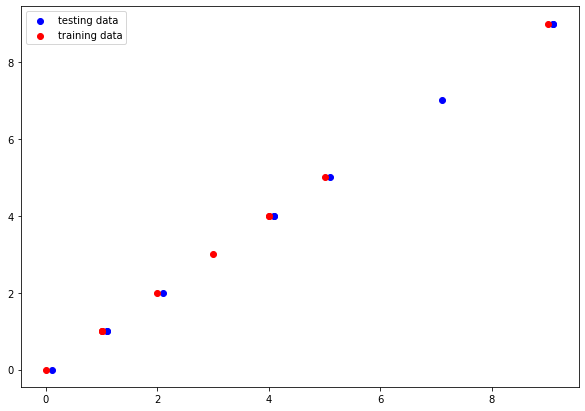

In [30]:
plt.figure(figsize=(10,7))
plt.scatter(test_labels[:10]+0.1, labels_test , c='b', label="testing data")
# print(training_labels[:10])
# print(labels_train)
plt.scatter(training_labels[:10], labels_train , c='r', label="training data")
plt.legend()

4


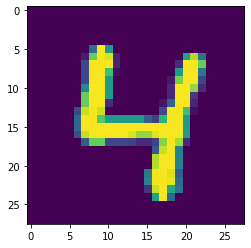

In [23]:
test_Image = 56
plt.imshow(test_images[test_Image])
prediction=model.predict(test_images)
print(np.argmax(prediction[test_Image]))

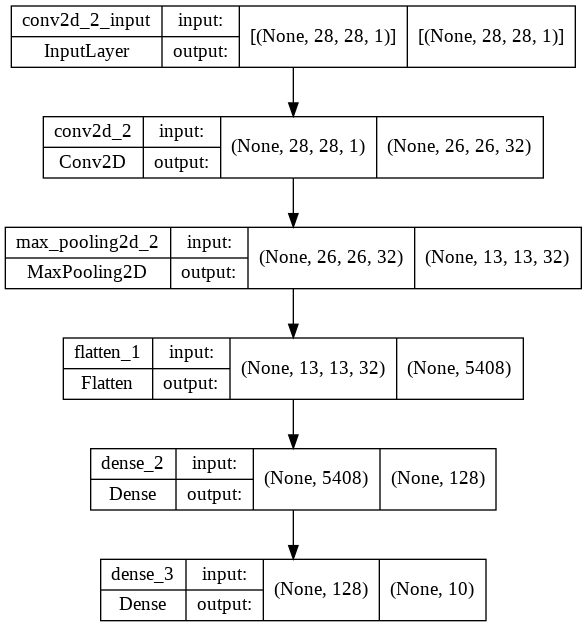

In [24]:
tf.keras.utils.plot_model(model, show_shapes=True)

In [25]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 5408)              0         
                                                                 
 dense_2 (Dense)             (None, 128)               692352    
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                                 
Total params: 693,962
Trainable params: 693,962
Non-trainable params: 0
________________________________________________